# Lognormal spot rate model

**Importing necessary libraries**

In [10]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Plotting lognormal distribution**

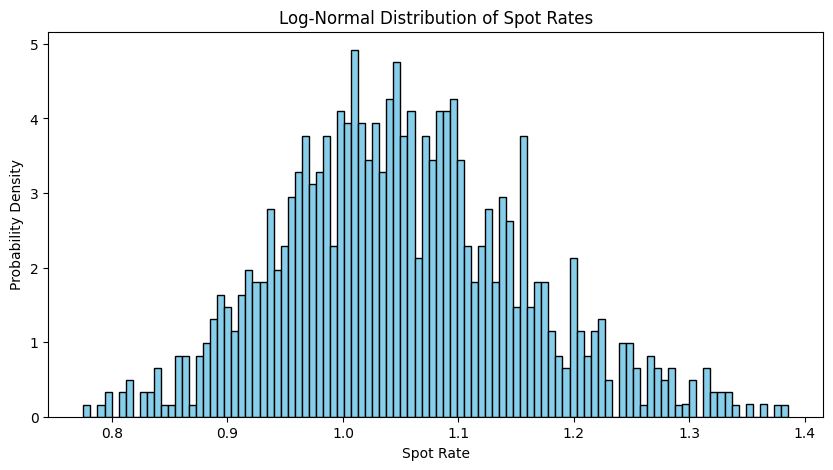

In [23]:
# parameters for log-normal distribution
mu = 0.05  # Mean of the distribution (spot rate)
sigma = 0.1  # Standard deviation of the distribution (volatility of spot rate)

# generating random numbers from log-normal distribution
np.random.seed(0)
sample_size = 1000
lognormal_samples = np.random.lognormal(mean=mu, sigma=sigma, size=sample_size)

# plotting the histogram of log-normal samples
plt.figure(figsize=(10, 5))
plt.hist(lognormal_samples, bins=100, density=True, color='skyblue', edgecolor='black')
plt.title('Log-Normal Distribution of Spot Rates')
plt.xlabel('Spot Rate')
plt.ylabel('Probability Density')
#saving the plot
#plt.savefig('lognormal_distribution.png')
plt.show()

**Valuation of interest rate options under the Black-Scholes pricing model**

In [20]:
#parameters of the option
S = 100  # Current price of the underlying asset (spot price)
K = 100  # Strike price of the option contract
T = 1    # Time to expiration (in years)
r = 0.05  # Current risk-free interest rate
sigma = 0.2  # Volatility of the underlying asset's spot rate

#functions for Black-Scholes option pricing model
def d1(S, K, T, r, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    return (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def call_option_price(S, K, T, r, sigma):
    return S * norm.cdf(d1(S, K, T, r, sigma)) - K * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, sigma))

def put_option_price(S, K, T, r, sigma):
    return K * np.exp(-r * T) * norm.cdf(-d2(S, K, T, r, sigma)) - S * norm.cdf(-d1(S, K, T, r, sigma))

call_price = call_option_price(S, K, T, r, sigma)
print("Theoretical Call Option Price:", call_price)
put_price = put_option_price(S, K, T, r, sigma)
print("Theoretical Put Option Price:", put_price)


Theoretical Call Option Price: 10.450583572185565
Theoretical Put Option Price: 5.573526022256971


Option price sensitivity to changes in the volatility of the underlying interest rate:

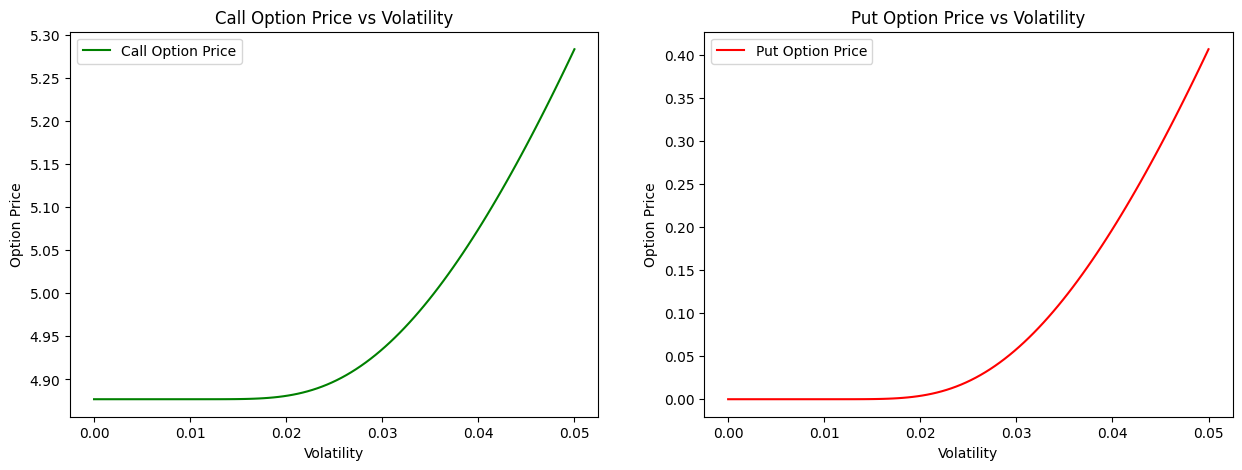

In [32]:
# plotting option price sensitivity to changes in volatility
volatility_range = np.linspace(0.05, 0, 100)
call_option_prices = [call_option_price(S, K, T, r, vol) for vol in volatility_range]
put_option_prices = [put_option_price(S, K, T, r, vol) for vol in volatility_range]


#plotting the option price sensitivity to changes in volatility
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(volatility_range, call_option_prices, label='Call Option Price', color='green')
axs[0].set_title('Call Option Price vs Volatility')
axs[0].set_xlabel('Volatility')
axs[0].set_ylabel('Option Price')
axs[0].legend()
axs[1].plot(volatility_range, put_option_prices, label='Put Option Price', color='red')
axs[1].set_title('Put Option Price vs Volatility')
axs[1].set_xlabel('Volatility')
axs[1].set_ylabel('Option Price')
axs[1].legend()

#saving the plot
#plt.savefig('option_price_sensitivity.png')
plt.show()

Option price sensitivity to changes in the drift of the underlying interest rate:

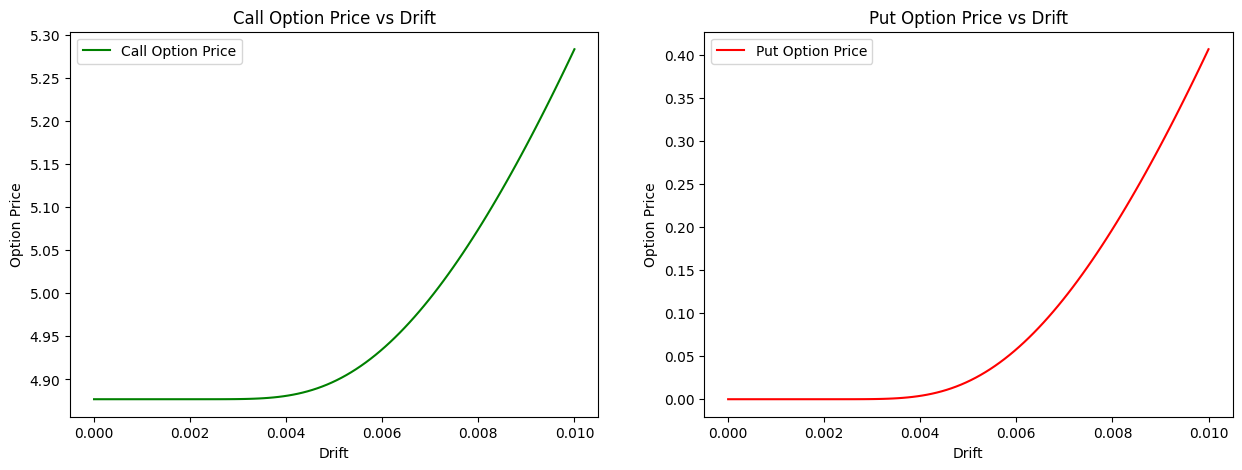

In [33]:
#parameters of the option
S = 100  # Current price of the underlying asset (spot price)
K = 100  # Strike price of the option contract
T = 1    # Time to expiration (in years)
r = 0.05  # Current risk-free interest rate
sigma = 0.2  # Volatility of the underlying asset's spot rate

#defining range of drift values
r_range = np.linspace(0.01, 0, 100)
call_option_prices = [call_option_price(S, K, T, r, vol) for vol in volatility_range]
put_option_prices = [put_option_price(S, K, T, r, vol) for vol in volatility_range]

#plotting the option price sensitivity to changes in drift
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(r_range, call_option_prices, label='Call Option Price', color='green')
axs[0].set_title('Call Option Price vs Drift')
axs[0].set_xlabel('Drift')
axs[0].set_ylabel('Option Price')
axs[0].legend()
axs[1].plot(r_range, put_option_prices, label='Put Option Price', color='red')
axs[1].set_title('Put Option Price vs Drift')
axs[1].set_xlabel('Drift')
axs[1].set_ylabel('Option Price')
axs[1].legend()

#saving the plot
#plt.savefig('option_price_sensitivity_drift.png')
plt.show()